In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models

In [ ]:
!unzip Facial_Images.zip
%ls

Streaming output truncated to the last 5000 lines.
 extracting: Facial_Images/validation/fear/9101.jpg  
 extracting: Facial_Images/validation/fear/911.jpg  
 extracting: Facial_Images/validation/fear/9179.jpg  
 extracting: Facial_Images/validation/fear/9205.jpg  
 extracting: Facial_Images/validation/fear/9232.jpg  
 extracting: Facial_Images/validation/fear/9251.jpg  
 extracting: Facial_Images/validation/fear/9261.jpg  
 extracting: Facial_Images/validation/fear/9281.jpg  
 extracting: Facial_Images/validation/fear/9302.jpg  
 extracting: Facial_Images/validation/fear/9333.jpg  
 extracting: Facial_Images/validation/fear/9369.jpg  
 extracting: Facial_Images/validation/fear/9370.jpg  
 extracting: Facial_Images/validation/fear/9474.jpg  
 extracting: Facial_Images/validation/fear/949.jpg  
 extracting: Facial_Images/validation/fear/9602.jpg  
 extracting: Facial_Images/validation/fear/9606.jpg  
 extracting: Facial_Images/validation/fear/9842.jpg  
 extracting: Facial_Images/valida

In [ ]:
train_data_path = 'Facial_Images/train/'
test_data_path = 'Facial_Images/validation/'

In [ ]:
import os

In [ ]:
total = 0
for expression in os.listdir(train_data_path):
  print(expression, ": ", len(os.listdir(train_data_path + expression)))
  total = total + len(os.listdir(train_data_path + expression))
print("Total: ", total)

fear :  4103
surprise :  3205
disgust :  436
sad :  4938
neutral :  4982
happy :  7164
angry :  3993
Total:  28821


In [ ]:
emotions = []
total = 0
for expression in os.listdir(test_data_path):
  print(expression, ": ", len(os.listdir(test_data_path + expression)))
  total = total + len(os.listdir(test_data_path + expression))
  emotions.append(expression)
print("Total: ", total)

fear :  1018
surprise :  797
disgust :  111
sad :  1139
neutral :  1216
happy :  1825
angry :  960
Total:  7066


In [ ]:
emotions.sort()
emotions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

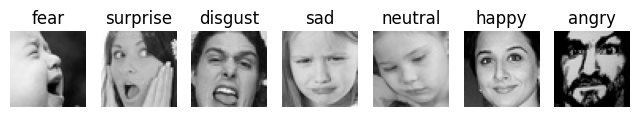

In [ ]:
i = 1
plt.figure(figsize=(8, 8))
for expression in os.listdir(train_data_path):
  image = load_img((train_data_path + expression) + '/' + os.listdir(train_data_path + expression)[0])
  plt.subplot(1, 7, i)
  plt.imshow(image)
  plt.title(expression)
  plt.axis('off')
  i = i + 1

In [ ]:
train_dat_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_dataset = train_dat_gen.flow_from_directory(
    train_data_path,
    shuffle = True,
    target_size = (48, 48),
    color_mode ='grayscale',
    class_mode = 'categorical',
    batch_size = 128
)

Found 28821 images belonging to 7 classes.


In [ ]:
test_dat_gen = ImageDataGenerator()

test_dataset = test_dat_gen.flow_from_directory(
    test_data_path,
    shuffle = True,
    target_size = (48, 48),
    color_mode ='grayscale',
    class_mode = 'categorical',
    batch_size = 128
)

Found 7066 images belonging to 7 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,179,975 (8.32 MB)

 Trainable params: 2,177,287 (8.31 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Monitor the validation loss
    factor=0.5,         # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5,         # Number of epochs with no improvement after which the learning rate will be reduced.
    min_lr=0.0001       # Lower bound on the learning rate.
)


history = model.fit(train_dataset, validation_data=test_dataset, epochs=50, batch_size=128, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.5133 - loss: 1.6279 - val_accuracy: 0.6360 - val_loss: 1.0036 - learning_rate: 0.0010
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.5580 - loss: 1.1819 - val_accuracy: 0.6146 - val_loss: 1.0541 - learning_rate: 0.0010
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.5709 - loss: 1.1462 - val_accuracy: 0.6459 - val_loss: 0.9699 - learning_rate: 0.0010
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.5707 - loss: 1.1236 - val_accuracy: 0.6204 - val_loss: 1.0252 - learning_rate: 0.0010
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.5829 - loss: 1.1020 - val_accuracy: 0.6425 - val_loss: 0.9665 - learning_rate: 0.0010
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.5899 - loss: 1.0939 - val_accuracy: 0.6295 - val_loss: 0.9911 - learning_rate: 0.0010
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.5900 - loss:

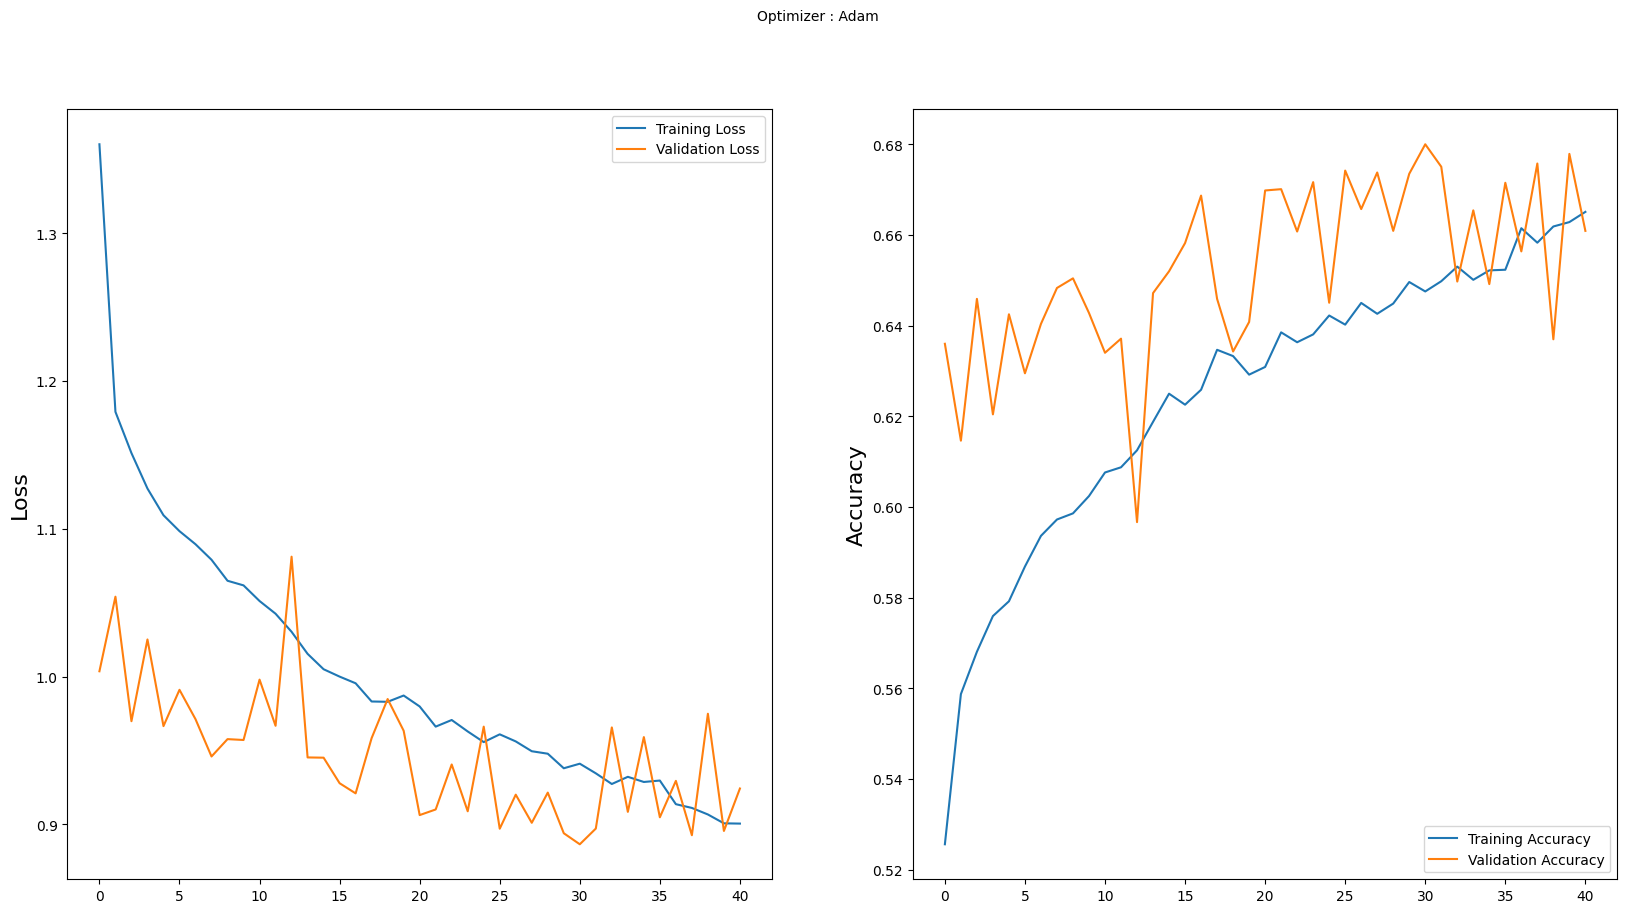

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [2]:
import cv2

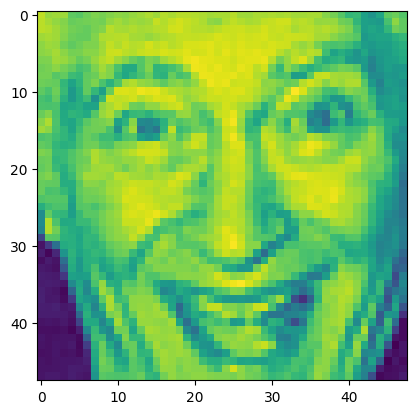

In [ ]:
image = cv2.imread('/content/333.jpg')[:, :, 0]
image = cv2.resize(image, (48, 48))
plt.imshow(image)
image = np.invert(np.array([image]))

In [ ]:
output = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
np.argmax(output)

np.int64(3)

In [ ]:
data = emotions[np.argmax(output)]

In [ ]:
print(data)

happy


In [ ]:
model.save('face_emotion_classification.keras')

In [ ]:
print('Tensorflow: ', tf.__version__)
print('Numpy: ', np.__version__)

Tensorflow:  2.19.0
Numpy:  2.0.2


In [3]:
print('CV2: ', cv2.__version__)

CV2:  4.12.0
